<a href="https://colab.research.google.com/github/caiommoreno/fraud_detection_ML_analysis/blob/main/Machine_Learning_Model_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model - Credit Card Fraud Detection

In this project we are going to analyze one of the biggest world tech problems: credit card frauds.

Our dataset it's from a real European cardholder made by credit cards in September 2013, ocurred in two days, who has their personal information protected.

We can't see what is those variables; but for us, it's an irrelevant factor. If the variables have the same relevance from the whole problem, the Machine Learning algorithm just need to recognize patterns from them. In other words, all those variables inside our dataset has the same influence for the result.

Europe's card fraud losses amount to over 1.83 billion dollar, with the U.K. accounting for 45.36% of the losses at 833 million and France accounting for the second-highest losses 519 million, [according to research data Buy Shares](https://www.mobilepaymentstoday.com/news/credit-card-fraud-in-europe-hits-155-billion-euros/).
⠀    
      
 
<center>
<img alt="Athens" width="50%" src="https://images.unsplash.com/photo-1430276084627-789fe55a6da0?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=752&q=80">

*Photo by [
Ryan Born](https://unsplash.com/@b0rno) in [Unsplash](https://unsplash.com/)*
</center>


Another factor to be considered is the amount of false negatives, that is, those times you when you tried to make a purchase and had your card blocked preventively, wich probably caused stress and embarrassment.

For all these reasons, the investments on this area of fraud detection using Artificial Intelligence techniques has growing every year, getting bigger and bigger, representing a great opportunity for Data Sciennces projects.

The more data there is in the historical base, more the algorithm learn with patterns. If someone build a Machine Learning model that is a little bit better than the previous, represents a big amount of millions of dollars. 

And that is the challenge: to constantly improve the use of algorithms to inhibit or prevent fraudulent transactions.


## Importing the data - Part I

The dataset used in this project is available in one of the biggest communities of data scientists and competitions: [Kaggle](https://www.kaggle.com/).

You can see more specific and technical information about this dataset [here](https://www.kaggle.com/mlg-ulb/creditcardfraud), but the main information it's gonna be in this article section.

Just as it was mentioned earlier, the data has been made by some European credit card company, representing the financial transactions that took place in period of two days, where **492 frauds** were classified into almost **290 thousand transactions**

As you can see, this is a very unbalanced dataset, where fraudulent transactions represent only 0,17% of their total. 

And all this information is numeric values, which we don't know what it is, due to the data privacy policy laws. So, the name of the columns are represented by $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://github.com/caiommoreno/fraud_detection_ML_analysis/blob/main/cartoon-retro-bank-building-courthouse-with-columns-illustration-isolated-white_53562-8133.jpg?raw=true" width="50%"></p>

On the official dataset page, it is also reported that the variables passed by a transformation known as Principal Component Analysis (PCA), where you can read more [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

PCA technique allows the reduction of dimensionality and noise filtering, while maintaining the largest possible amount of information. To achieve this, the algorithm finds a new set of resources - the so-called  **components**. 

In the next topic, I will explain how this method works, but it is not the focus of this article.


### PCA Analysis

With more technical explanation, to see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.

<p align=center>
<img src="https://github.com/caiommoreno/fraud_detection_ML_analysis/blob/main/pca_1.png?raw=true" width="50%"></p>

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

<p align=center>
<img src="https://github.com/caiommoreno/fraud_detection_ML_analysis/blob/main/pca_2.png?raw=true" width="50%"></p>


## Importing the data - Part II

Now, we are going to import the libraries to clean, model, visualize and optimize the data.

In [1]:
# installing libraries

# exclude warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# install scikit-plot
!pip install -q scikit-plot

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configure Seaborn styles
sns.set_style('dark')

To facilitate data acquisition, I made a link with direct access to `csv` file into my Dropbox.. With that, it's just needed to import the data set using the `pd.read_csv ()` method.

In [3]:
# import the data into a Dataframe pandas structure
file_path = "https://www.dropbox.com/s/hw8ek7i8mp85f71/creditcard.csv?dl=1"


df = pd.read_csv(file_path)

With all the data imported into a dataframe structure, we don't have more need for any further adjustment or data configuration.

We are ready to do an exploratory analysis, preparing and modelling our dataset to implement a Machine Learning model.


## Data Analysis

Just looking to the first five entrys, it's possible to have some conclusions:

* `Time` and `Amount` columns were preserved, maintaining its original value;

* We can observe a pattern how the PCA transformation works, and what they do with the components anonymously and numeric.

* The result variable it's represented by `Class` column, where:
    * **0:** normal transaction; and
    * **1:** fraudulent transaction;


In [4]:
# see the first 5 entrys of every column
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Using the `describe()` method below to see the statistical resume of the variables, we can assure the main components after the PCA transformation does not have any apparent discrepancy, as well as the `Time` column.

The `Amount` variable mean value it's 88.34, and median equals to 22.00, with a standart deviation of 250.21, with a maximum value of 25691.16, proving the mostly financial transactions are made up of smaller amounts.



In [5]:
# see the statistical resume
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As for the quality of the dataset, it did not present any missing value, so we don't need a data cleaning step. In the function below, notice that the highest value per column for null values is zero, which confirms that there are no missing values.

In [6]:
# ver se há valores ausentes
df.isnull().sum().max()

0

As mentioned before, the fraudulent transactions entrys correspond to 0.17% of the total.

The bar graph below shows how this discrepancy becomes clear and visible. 

In practice, this interferes with the performance of the model, and it will be necessary to balance the data before feeding the final classification model.

This is one of the most challenges in big data analysis, with more complex problems. For example, if a Machine Learning model analyze phrases in the whole internet about "doctors", most of them gonna be men, the case gonna be the same for the word "nurse", referring for women.

It's a very hot topic on how to manage it. But in our specific case, we're going to balance the dataset.


0    284315
1       492
Name: Class, dtype: int64

Frauds represent 0.1727% of dataset.



[]

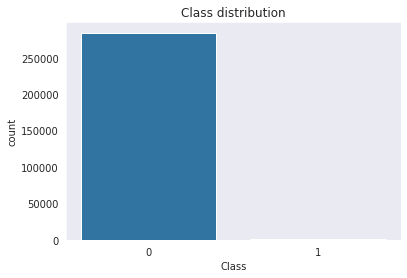

In [7]:
# see the balance of Class column
print(df.Class.value_counts())
print("\nFrauds represent {:.4f}% of dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plot bar graph to Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Class distribution')
plt.plot()

To see if are some additional information on `Times` column, we gonna plot two graphs over the time dimension.

As you can see, there is no information or patterns to observe in normal transactions or fraud transactions in time domain.

This is one of the jobs of data scientists: **trying to figure out what the data can tell us.**

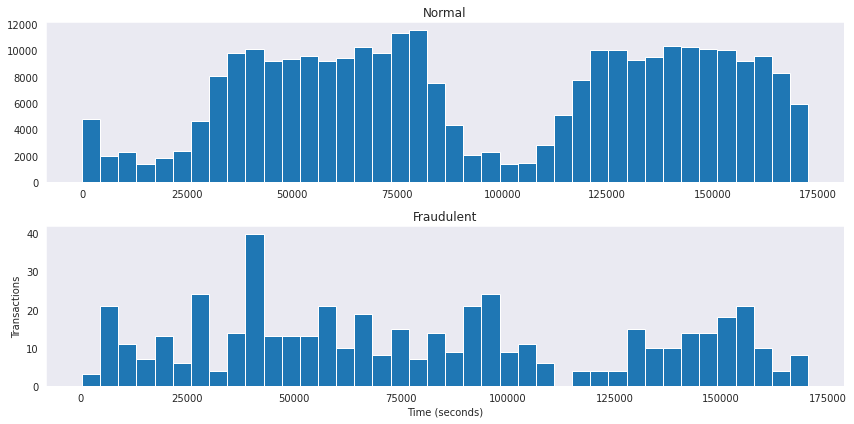

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraudulent')

plt.xlabel('Time (seconds)')
plt.ylabel('Transactions')
plt.tight_layout()

Now, we gonna investigate the `Amount` variable.

Here it's two boxplots, to see if are some patterns between the two same classes: fraudulent and normal transactions.

As we can see, there is a different distribution for both of them, contributing with the Machine Learning training model. (Lucky for us!)

The training model is similar of a human being: **we need to check different characteristics and signs to learn the patterns.**

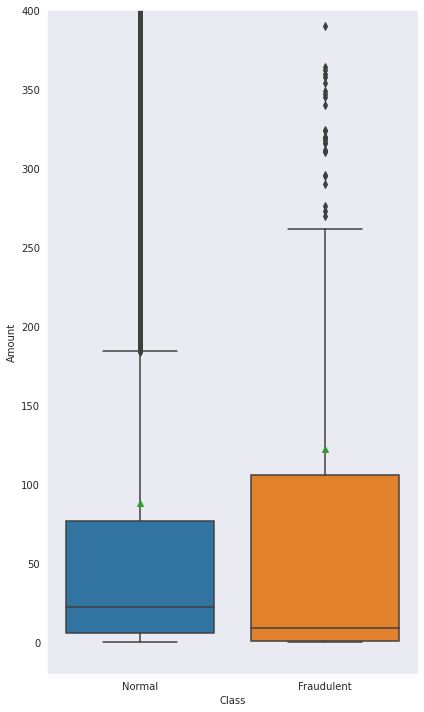

In [9]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraudulent'])

plt.tight_layout()

The statistical information for fraudulent transactions (`df.Class == 1`) show us that your exact mean is at 122.21 and the median at 9.25.

In [10]:
df[(df.Class == 1)]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The density graph is very useful for comparing the distributions of each variable for each class and see which ones are most important for anomaly detection.

The goal in this type of visualization are distributions that differ from one another, allowing fraud to be identified more easily.

Like I mentioned before: **Machine Learning it's like us learning, identifying patterns and differences.**

See as an example the variables `V3`,` V4`, `V10` and` V11`, as they are quite distinct.

On the other hand, variables like `V8`,` V13` and `V15` are very similar, presenting approximately the same shape.

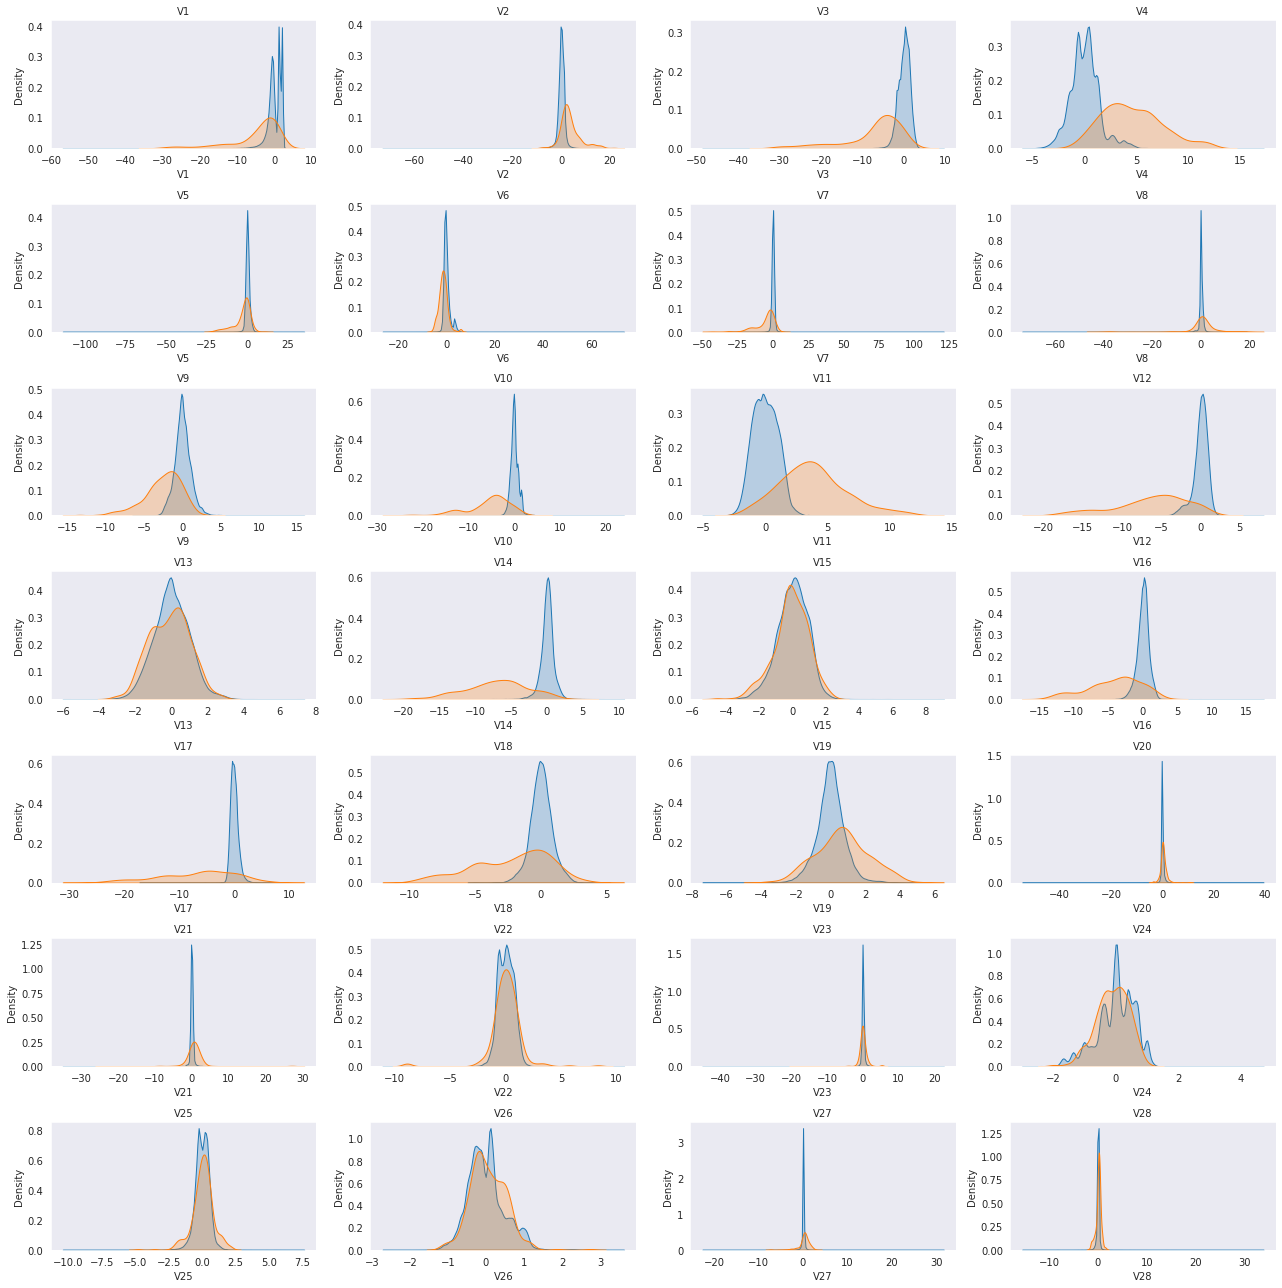

In [11]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


In resume, let's recap the main information from this data analysis.

Note that at this stage I just put the information in a clear and objective way, without any data preparation.

In resume, we have:

* The dataset is clearly unbalanced: the fraudulent transactions represent only 0.17% of total entrys;
* The dataset apparently it's okay to work. Since the PCA transformationis sensitive to the scale of the variables, it is assumed that the original features — before the data protection from the bank — were standardized;
* There is no missing or null values;
* `Time` and `Amount` columns appear to be original, however, are not standardized.

## Data Preparation or Data Modelling

To make the data fit to the Machine Learning Model, we need to build them correctly. The Model that we are going to use it's the **Logistic Regression.**

What we gonna do:

* Padronize the features `Time` and `Amount`, because they are in another magnitude;
* Divide the whole dataset to train and test;
* Balance the data to avoid a low performance for class 1 and overfitting. (Remember the doctor or nurse case I told you previously?)

To explain what is overfitting, I like to create an analogy:

Imagine a classroom full of students who need to take an exam. The content of this exam was shown and trained days before. If the exam is **exactly** the same as the exercises done in class (training), the students learnt by heart the content, and did not learn effectively.

**Stage I - Padronize columns**

As we saw in the previous section, the `Amount` column has outliers, and at this stage, he gonna be padronized by the `StandardScaler` Python Class.

The same is going to be to the `Time` column.

In [12]:
# padronize Time and Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# show the first 5 entrys
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Stage II - Split the dataset into train and test**

Before proceeding with data balancing, we must split the existing data between train and test. Otherwise, we can't check if the parameters was adequate to the balance.

To ensure that the training and test sets have the same amount of results proportionally, we pass `stratify = Class`.


In [21]:
# separate the dataset to inputs(X) and outputs(y)
X = df_clean.drop('Class', axis=1)
y = df['Class']

# Split the dataset to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Stage III - Balancing the data**

Using the library `imblearn` it's possible to apply easily data balance techniques. In that case, we used the "Under-Sampling" method, preserving the class with minority values.

It's easy to visualize that there is no longer the initial discrepancy from the dataset.

1    369
0    369
dtype: int64


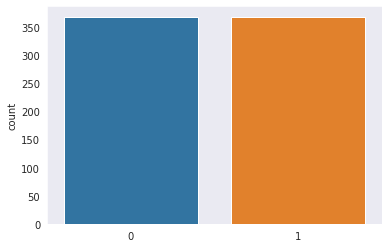

In [14]:
# using under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# see the balance by numbers
print(pd.Series(y_rus).value_counts())

# plot the new result distribution
sns.countplot(y_rus);

With the data balanced, we can check the correlation matrix to identify what variables are more correlated than others.

Notiche that how before the data balacing, the correlation matrix don't give us any relevant information. 

However, after the correctly data balance method, it brings much more relevant information.


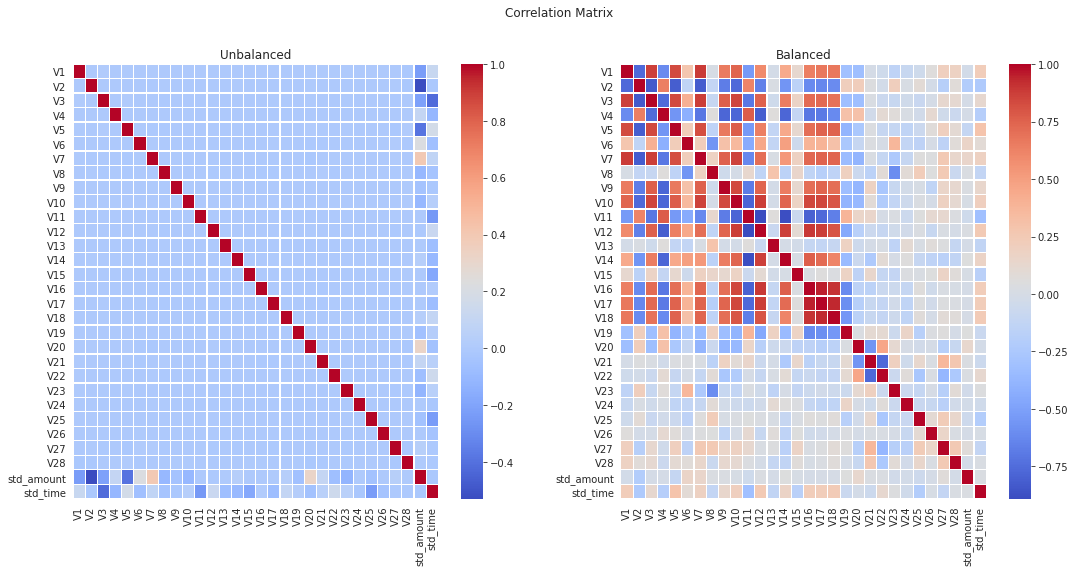

In [22]:
# plot correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

## Machine Learning Model

With all data analysis, preparation and modelling, we are going to build a classificator using Logistic Regression.

It will be trained on the data in `X_rus` and` y_rus` (already balanced data). Subsequently, predictions on the test data will be made.


In [24]:
# Logistic Regression training model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# make the predictions using the train and test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

With the model trained and the predictions made, we proceed to measure the performance.

In this type of problem, originally unbalanced, accuracy is not an adequate metric. We need to analyze the Recall, Precision and F1 Score. It's statistical analysis that you can read more [here](https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488). 

For example, you can have an accuracy of 99.88% and detect less than 60% of fraud, because your analysis it's on the whole dataset, and not just on frauds.

Look at the confusion matrix to see the hit rate for fraudulent transactions, or looking at "recall" column of the Classification Report.

Another metric considered interesting to evaluate the effectiveness is the [AUC ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20stands%20for%20"Area%20under,across%20all%20possible%20classification%20thresholds.) — where is very well explained on this topic on Google Developers website  — or area under the curve. In our case, this Logistic Regression model has 95% of AUC.


Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9728    0.9861     71079
           1     0.0552    0.9187    0.1041       123

    accuracy                         0.9727     71202
   macro avg     0.5275    0.9457    0.5451     71202
weighted avg     0.9982    0.9727    0.9846     71202

Accuracy: 0.9727

AUC: 0.9457



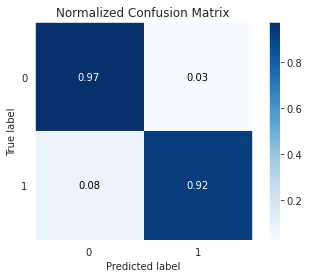

In [26]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# accuracy model
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# AUC ROC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Conclusions

As we can see, 80% of the problem was figuring out what the dataset is; what kind of variables; and what insights we can have with it.

Despite the data being well treated and clean on the Kaggle website, with no missing values or categorical variables, the imbalance and the PCA Transformation required considerable work — if the data was with missing values, corrupted or wrong entrys, it would require more steps to prepare.

We had a really good result, but a Machine Learning project always has space to test another classification algorithms, optimize parameters, or even Deep Learning Techniques.

I hope you enjoy this analysis, and if you want to talk more with me about this world, I am always on [Instagram](https://www.instagram.com/caiommoreno/) talking about data-driven methodology, or at [LinkedIn](https://www.linkedin.com/in/caiommoreno/). :)